# Quiz 4 - Lending Club Loan Data (SQL)

- 🏆 25 points available
- ⏱ 25 minutes

▶️ First, run the code cell below to import `unittest`, a module used for **🧭 Check Your Work** sections and the autograder.

In [17]:
# DO NOT MODIFY THE CODE IN THIS CELL
import unittest
import base64
tc = unittest.TestCase()

---

### 🎯 Import packages

#### 👇 Tasks

- ✔️ Import the following Python packages.
    1. `pandas`: Use alias `pd`.
    2. `numpy`: Use alias `np`.
    3. `sqlite3`: No alias

In [18]:
# YOUR CODE BEGINS
import pandas as pd
import numpy as np
import sqlite3

# YOUR CODE ENDS

#### 🧭 Check your work

In [19]:
# DO NOT CHANGE THE CODE IN THIS CELL
tc.assertTrue('pd' in globals(), 'Check whether you have correctly imported Pandas with an alias.')
tc.assertTrue('np' in globals(), 'Check whether you have correctly imported NumPy with an alias.')
tc.assertTrue('sqlite3' in globals(), 'Check whether you have correctly imported the sqlite3 package.')

---
### 📌 Populate a database table from a CSV file

▶️ Run the code below to populate the `loans` table.

In [20]:
conn = sqlite3.connect('lending-club-loan-results.db')
c = conn.cursor()

tables = list(pd.read_sql_query('SELECT * FROM sqlite_master WHERE type="table";', con=conn)['tbl_name'])

if 'loans' in tables:
    c.execute(f'DELETE FROM loans')
    conn.commit()
    
pd.read_csv('https://github.com/bdi475/datasets/raw/main/lending-club-loan-results.csv.gz',
                         compression='gzip') \
    .to_sql(name='loans', index=False, con=conn, if_exists='append')

conn.close()

#### 🧭 Check whehter database file was created successfully

In [21]:
# DO NOT CHANGE THE CODE IN THIS CELL
conn_checker = sqlite3.connect('lending-club-loan-results.db')
table_to_check = 'loans'

# Check if table exists
user_tables = list(pd.read_sql_query('SELECT * FROM sqlite_master WHERE type="table";', con=conn_checker)['tbl_name'])
tc.assertTrue(table_to_check in user_tables, f'{table_to_check} does not exist in your NWT.db file!')

conn_checker.close()

The table below describes the columns in the `loans` table.

| Field | Description |
|---|---|
| loan_amnt | listed amount of the loan   applied for by the borrower |
| int_rate | interest rate on the loan   (between 0 and 1) |
| term_in_months | number of payments on the loan -   either 36 or 60 months |
| grade | assigned loan grade (A, B, C, D,   E, F, G) |
| job_title | job title supplied by the   Borrower when applying for the loan |
| home_ownership | home ownership status provided   by the borrower during registration (RENT, OWN, MORTGAGE) |
| annual_inc | self-reported annual income   provided by the borrower during registration |
| loan_status | result of the loan (Fully Paid   or Charged Off) |
| purpose | a category provided by the   borrower for the loan request |
| did_default | 0 == paid in full, 1 == default   (charged off) |

▶️ Run the code below to display the first 10 rows of the `loans` table.

In [22]:
conn = sqlite3.connect('lending-club-loan-results.db')
display(pd.read_sql_query('SELECT * FROM loans LIMIT 10', con=conn))
conn.close()

,loan_amnt,int_rate,term_in_months,grade,job_title,home_ownership,annual_inc,loan_status,purpose,did_default
0,30000,0.2235,36,D,Supervisor,MORTGAGE,100000.0,Fully Paid,debt_consolidation,0
1,20000,0.0756,36,A,Teacher,MORTGAGE,100000.0,Fully Paid,credit_card,0
2,2500,0.1356,36,C,Manager,RENT,42000.0,Fully Paid,other,0
3,12950,0.0756,36,A,Teacher,MORTGAGE,55000.0,Fully Paid,debt_consolidation,0
4,5000,0.1033,36,B,Police Officer,MORTGAGE,118964.0,Fully Paid,credit_card,0
5,3000,0.1992,36,D,Teacher,RENT,62000.0,Fully Paid,debt_consolidation,0
6,6000,0.1614,36,C,Truck Driver,RENT,50000.0,Fully Paid,credit_card,0
7,4500,0.1072,36,B,Teacher,RENT,55000.0,Fully Paid,debt_consolidation,0
8,20000,0.0819,36,A,Project Manager,RENT,105000.0,Fully Paid,credit_card,0
9,6000,0.1502,36,C,Teacher,MORTGAGE,101000.0,Fully Paid,vacation,0


---

### 🎯 Challenge 1: Find high profile defaults

#### 👇 Tasks

- ✔️ Write a query that:
    - selects all columns,
    - from the `loans` table,
    - where the `job_title` is `"CEO"`, `annual_inc` is greater than `425000`, **and** `did_default` is `1`
- ✔️ Store your query to a new variable named `query_high_profile_defaults`.
- ✔️ The order of rows does not matter.

#### 🔑 Expected output

|    |   loan_amnt |   int_rate |   term_in_months | grade   | job_title   | home_ownership   |   annual_inc | loan_status   | purpose        |   did_default |
|---:|------------:|-----------:|-----------------:|:--------|:------------|:-----------------|-------------:|:--------------|:---------------|--------------:|
|  0 |       25875 |     0.2649 |               60 | F       | CEO         | RENT             |       450000 | Charged Off   | small_business |             1 |
|  1 |       30000 |     0.1599 |               36 | D       | CEO         | RENT             |       450000 | Charged Off   | small_business |             1 |

In [23]:
# YOUR CODE BEGINS

query_high_profile_defaults ='''
SELECT * FROM loans
WHERE job_title = 'CEO' and annual_inc > 425000
 and did_default = 1
'''

# YOUR CODE ENDS
conn = sqlite3.connect('lending-club-loan-results.db')
df_result = pd.read_sql_query(query_high_profile_defaults, con=conn)
display(df_result)
conn.close()

,loan_amnt,int_rate,term_in_months,grade,job_title,home_ownership,annual_inc,loan_status,purpose,did_default
0,25875,0.2649,60,F,CEO,RENT,450000.0,Charged Off,small_business,1
1,30000,0.1599,36,D,CEO,RENT,450000.0,Charged Off,small_business,1


#### 🧭 Check your work

In [24]:
_test_case = "part-01"
_points = 6

conn = sqlite3.connect('lending-club-loan-results.db')
decoded_query = base64.b64decode(b'ClNFTEVDVCAqCkZST00gbG9hbnMKV0hFUkUgKGpvYl90aXRsZSA\
9ICJDRU8iKSBBTkQgKGFubnVhbF9pbmMgPiA0MjUwMDApIEFORCAoZGlkX2RlZmF1bHQgPSAxKQpPUkRFUiBCWSBsb2FuX2FtbnQ7Cg==').decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
pd.testing.assert_frame_equal(df_result.sort_values(df_result.columns.tolist()).reset_index(drop=True),
                              df_check.sort_values(df_check.columns.tolist()).reset_index(drop=True))
conn.close()

---

### 🎯 Part 2: Stats by loan term

#### 👇 Tasks

- ✔️ Write a query that summarizes the average interest rate and the default rate for each loan term.
- ✔️ Use the following column names:
    - `term_in_months`: Term of each loan (36 or 60)
    - `avg_int_rate`: Average interest rate for each term
    - `default_rate`: Default rate for each term
        - This is the average of `did_default` column.
- ✔️ Sort the result by `term_in_months` in ascending order.
- ✔️ Store your query to a new variable named `query_stats_by_term`.

#### 🔑 Expected output

|    |   term_in_months |   avg_int_rate |   default_rate |
|---:|-----------------:|---------------:|---------------:|
|  0 |               36 |       0.118398 |       0.162467 |
|  1 |               60 |       0.165742 |       0.342822 |

In [25]:
# YOUR CODE BEGINS
query_stats_by_term = '''
SELECT term_in_months, AVG(int_rate) as avg_int_rate, AVG(did_default) as default_rate
FROM loans GROUP BY term_in_months ORDER BY term_in_months

'''




# YOUR CODE ENDS
conn = sqlite3.connect('lending-club-loan-results.db')
df_result = pd.read_sql_query(query_stats_by_term, con=conn)
display(df_result)
conn.close()

,term_in_months,avg_int_rate,default_rate
0,36,0.118398,0.162467
1,60,0.165742,0.342822


#### 🧭 Check your work

In [26]:
_test_case = "part-02"
_points = 7

conn = sqlite3.connect('lending-club-loan-results.db')
decoded_query = base64.b64decode(b'ClNFTEVDVAogICAgdGVybV9pbl9tb\
250aHMsCiAgICBBVkcoaW50X3JhdGUpIEFTIGF2Z19pbnRfcmF0ZSwKICAgIEFWR\
yhkaWRfZGVmYXVsdCkgQVMgZGVmYXVsdF9yYXRlCkZST00gbG9hbnMKR1JPVVAgQ\
lkgdGVybV9pbl9tb250aHMKT1JERVIgQlkgdGVybV9pbl9tb250aHM7Cg==').decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
pd.testing.assert_frame_equal(df_result.reset_index(drop=True),
                              df_check.reset_index(drop=True))
conn.close()

---

### 🎯 Part 3: Stats by home ownership type

#### 👇 Tasks

- ✔️ Write a query that summarizes the number of loans, average interest rate, and the default rate for each home ownership type.
- ✔️ Use the following column names:
    - `home_ownership`: Home ownership type (MORTGAGE, RENT, OWN)
    - `num_loans`: Number of loans for each home ownership type
    - `avg_int_rate`: Average interest rate for each home ownership type
    - `default_rate`: Default rate for each home ownership type
        - This is the average of `did_default` column.
- ✔️ Sort the result by `num_loans` in descending order.
- ✔️ Store your query to a new variable named `query_stats_by_home_ownership`.

#### 🔑 Expected output

|    | home_ownership   |   num_loans |   avg_int_rate |   default_rate |
|---:|:-----------------|------------:|---------------:|---------------:|
|  0 | MORTGAGE         |      107348 |       0.127241 |       0.179212 |
|  1 | RENT             |       75615 |       0.1336   |       0.245031 |
|  2 | OWN              |       22156 |       0.131165 |       0.209063 |

In [27]:
# YOUR CODE BEGINS

query_stats_by_home_ownership = '''
SELECT home_ownership, COUNT(*) as num_loans, AVG(int_rate) as avg_int_rate, AVG(did_default) as default_rate FROM loans
GROUP BY home_ownership ORDER BY num_loans DESC

'''




# YOUR CODE ENDS
conn = sqlite3.connect('lending-club-loan-results.db')
df_result = pd.read_sql_query(query_stats_by_home_ownership, con=conn)
display(df_result)
conn.close()

,home_ownership,num_loans,avg_int_rate,default_rate
0,MORTGAGE,107348,0.127241,0.179212
1,RENT,75615,0.133600,0.245031
2,OWN,22156,0.131165,0.209063


#### 🧭 Check your work

In [28]:
_test_case = "part-03"
_points = 7

conn = sqlite3.connect('lending-club-loan-results.db')
decoded_query = base64.b64decode(b'ClNFTEVDVAogICAgaG9tZV9vd25lcnNoaXAsCi\
AgICBDT1VOVCgqKSBBUyBudW1fbG9hbnMsCiAgICBBVkcoaW50X3JhdGUpIEFTIGF2Z19pbnR\
fcmF0ZSwKICAgIEFWRyhkaWRfZGVmYXVsdCkgQVMgZGVmYXVsdF9yYXRlCkZST00gbG9hbnMK\
R1JPVVAgQlkgaG9tZV9vd25lcnNoaXAKT1JERVIgQlkgbnVtX2xvYW5zIERFU0M7Cg==').decode()
df_check = pd.read_sql_query(decoded_query, con=conn)
pd.testing.assert_frame_equal(df_result.reset_index(drop=True),
                              df_check.reset_index(drop=True))
conn.close()

---

## 🍸 Submitting your notebook


There is one final step before exporting the notebook as an `.ipynb` file for submission. Restart your runtime (kernal) and run all cells from the beginning to ensure that your notebook does not contain any error.

- Go to the **"Runtime"** ("Kernel" if you're on Jupyter Lab) menu on top.
- Select **"Restart and run all"**.
- Make sure no code cell throws an error.
- Failing to pass this step may result in significant loss of points since the autograder will fail to run.<br /><br />

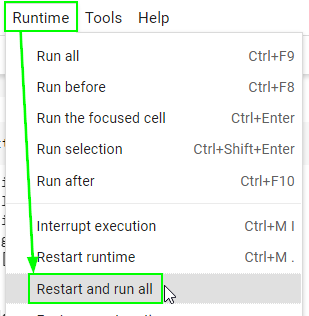

In [29]:
print('🎯 Restart and run all successful')

🎯 Restart and run all successful
